In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("./test_images/msdface.jpg")
img.shape


(570, 855, 3)

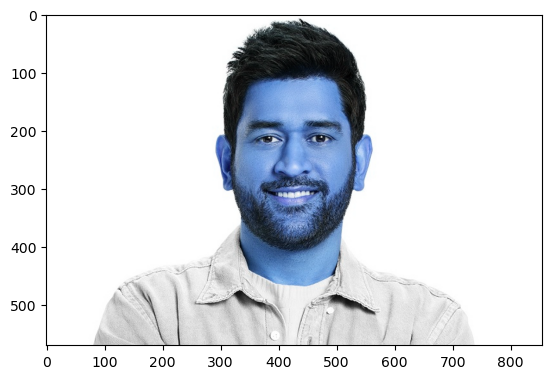

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(570, 855)

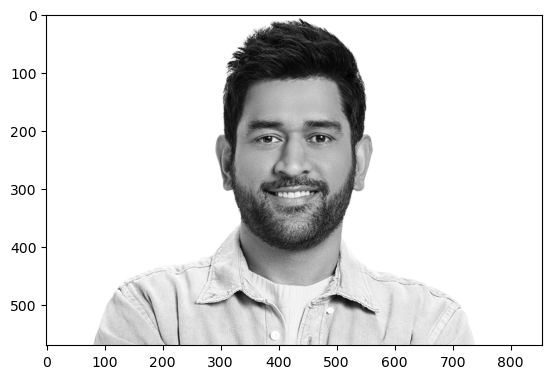

In [5]:
plt.imshow(gray, cmap = "gray")

In [6]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eyes_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[295, 105, 262, 262]], dtype=int32)

In [7]:
(x,y,w,h) =faces[0]
x,y,w,h

(295, 105, 262, 262)

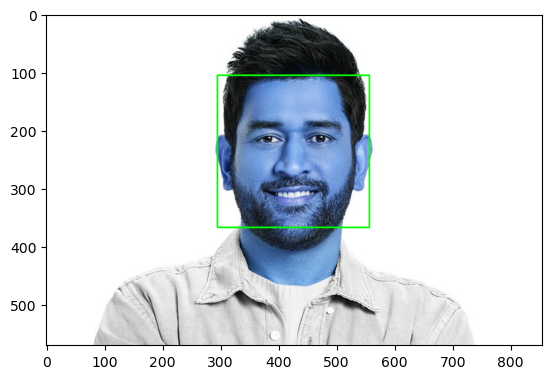

In [8]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
plt.imshow(face_img)

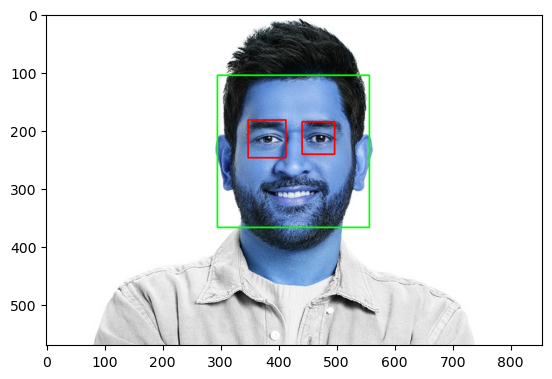

In [9]:
cv2.destroyAllWindows()

for x,y,w,h in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for ex,ey,ew,eh in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew, ey+eh), (255,0,0), 2)
        
plt.figure()
plt.imshow(face_img, cmap = "gray")
plt.show()

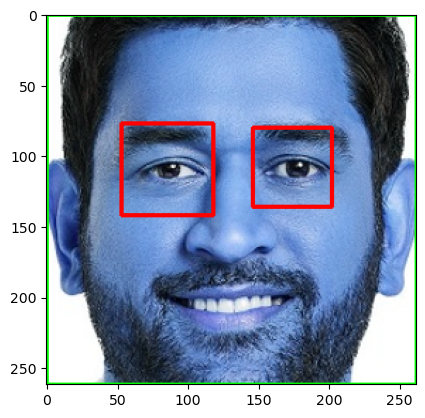

In [10]:
plt.imshow(roi_color, cmap = "gray")

In [11]:
def get_cropped_image_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = face_img[y:y+h,x:x+w]
    
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

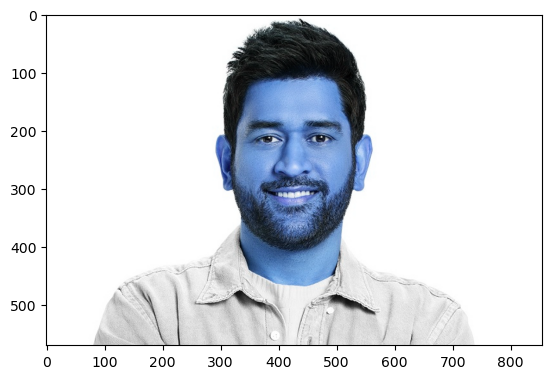

In [12]:
og_img = cv2.imread("./test_images/msdface.jpg")
plt.imshow(og_img)

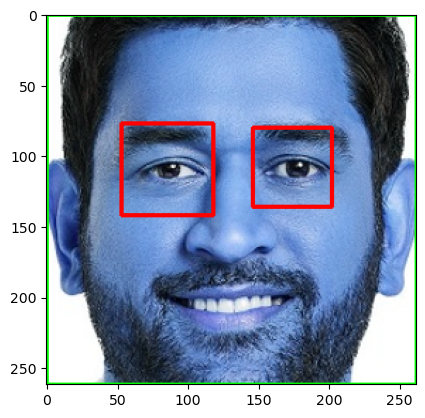

In [13]:
cropped_img = get_cropped_image_if_2_eyes("./test_images/msdface.jpg")

plt.imshow(cropped_img)

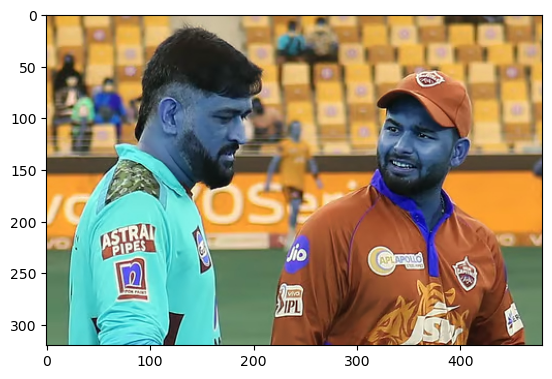

In [14]:
msdpantimg = cv2.imread("./test_images/msdpant.jpg")
plt.imshow(msdpantimg)

In [15]:
cropped_msdpantimg = get_cropped_image_if_2_eyes("./test_images/msdpant.jpg")
cropped_msdpantimg

# Creating new folder to store cropped images programetically

In [16]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"



In [17]:
import os

img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/cropped',
 './dataset/.ipynb_checkpoints',
 './dataset/kohli ',
 './dataset/sachin',
 './dataset/msd',
 './dataset/hitman']

# Creating Cropped folder

In [19]:
import shutil

In [20]:
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [21]:
import cv2

# Load the pre-trained cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def getCroppedImageIf2EyesFound(img_path):
    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Image not loaded")
        return None
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Iterate over detected faces
    for x, y, w, h in faces:
        # Extract the region of interest (ROI) from the grayscale and color images
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Check if at least two eyes are detected
        if len(eyes) >= 2:
            # Return the cropped region of the face
            return roi_color
    
    # If no suitable region is found, return None
    return None


In [22]:
# List to store directories containing cropped images
cropped_img_dirs = []

# Dictionary to store cricketer names and corresponding cropped image paths
cricketer_name_file_dict = {}

# Initialize count for naming cropped images
count = 1

# Loop over directories containing images of cricketers
for img_dir in img_dirs:
    cricketer_name = img_dir.split('/')[-1]
    print("Processing images for cricketer:", cricketer_name)
    
    # Create a list to store paths of cropped images for the current cricketer
    cricketer_name_file_dict[cricketer_name] = []
    
    # Iterate over images in the current directory
    for entry in os.scandir(img_dir):
        if entry.is_file():
            # Attempt to get cropped image
            roi_color = getCroppedImageIf2EyesFound(entry.path)
            
            # If a valid cropped image is obtained
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cropped_data, cricketer_name)
                
                # Create directory for cropped images if it doesn't exist
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_img_dirs.append(cropped_folder)
                    print("Generating cropped images folder in", cropped_folder)
                
                # Generate file name for cropped image
                cropped_file_name = f"{cricketer_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                # Save cropped image
                cv2.imwrite(cropped_file_path, roi_color)
                
                # Update dictionary with cropped image path
                cricketer_name_file_dict[cricketer_name].append(cropped_file_path)
                
                # Increment count
                count += 1


Processing images for cricketer: cropped
Processing images for cricketer: .ipynb_checkpoints
Processing images for cricketer: kohli 
Generating cropped images folder in ./dataset/cropped/kohli 
Processing images for cricketer: sachin
Generating cropped images folder in ./dataset/cropped/sachin


libpng warning: iCCP: known incorrect sRGB profile


Processing images for cricketer: msd
Generating cropped images folder in ./dataset/cropped/msd


libpng warning: iCCP: known incorrect sRGB profile


Error: Image not loaded
Error: Image not loaded
Error: Image not loaded


libpng warning: iCCP: known incorrect sRGB profile


Processing images for cricketer: hitman
Generating cropped images folder in ./dataset/cropped/hitman
Error: Image not loaded


libpng warning: iCCP: known incorrect sRGB profile


In [23]:
import numpy as np
import pywt
import cv2

In [24]:
def w2d(img, mode="haar", level=1):
    imArray = img
    #Datatype conversion
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode,level)
    
    #process coeffs
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H
    

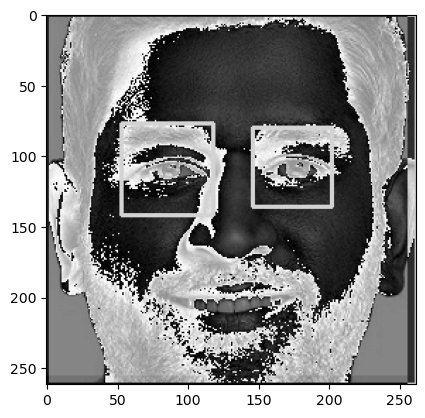

In [25]:
im_har = w2d(cropped_img, "db1", 5)
plt.imshow(im_har, cmap = "gray")

In [26]:
cricketer_name_file_dict

{'cropped': [],
 '.ipynb_checkpoints': [],
 'kohli ': ['./dataset/cropped/kohli /kohli _1.png',
  './dataset/cropped/kohli /kohli _2.png',
  './dataset/cropped/kohli /kohli _3.png',
  './dataset/cropped/kohli /kohli _4.png',
  './dataset/cropped/kohli /kohli _5.png',
  './dataset/cropped/kohli /kohli _6.png',
  './dataset/cropped/kohli /kohli _7.png',
  './dataset/cropped/kohli /kohli _8.png',
  './dataset/cropped/kohli /kohli _9.png',
  './dataset/cropped/kohli /kohli _10.png',
  './dataset/cropped/kohli /kohli _11.png',
  './dataset/cropped/kohli /kohli _12.png',
  './dataset/cropped/kohli /kohli _13.png',
  './dataset/cropped/kohli /kohli _14.png',
  './dataset/cropped/kohli /kohli _15.png',
  './dataset/cropped/kohli /kohli _16.png',
  './dataset/cropped/kohli /kohli _17.png',
  './dataset/cropped/kohli /kohli _18.png',
  './dataset/cropped/kohli /kohli _19.png',
  './dataset/cropped/kohli /kohli _20.png',
  './dataset/cropped/kohli /kohli _21.png',
  './dataset/cropped/kohli /kohl

In [27]:
class_dict = {}
count = 0

# Iterate over the cricketer names in cricketer_name_file_dict
for cricketer_name in cricketer_name_file_dict.keys():
    # Exclude keys that are not actual cricketer names
    if cricketer_name not in ['cropped', '.ipynb_checkpoints']:
        class_dict[cricketer_name] = count
        count += 1

class_dict


    

{'kohli ': 0, 'sachin': 1, 'msd': 2, 'hitman': 3}

In [28]:
X = []
y = []
for name, cropped_img_path in cricketer_name_file_dict.items():
    for imgs in cropped_img_path:
        img = cv2.imread(imgs)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32))
        transformed_img = w2d(img, "db1", 5)
        scaled_transformed_img = cv2.resize(transformed_img, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_transformed_img.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[name])

In [29]:
len(X[0])

4096

In [30]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(192, 4096)

# Since the data cleaning process is done now we will train our model

we will use SVM with rbf kernel tuned with heuristic finetuning

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = Pipeline([("scalar",StandardScaler()), ("svc", SVC(kernel="rbf", C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.00      0.00      0.00         4
           2       0.74      0.89      0.81        19
           3       1.00      0.33      0.50         6

    accuracy                           0.75        48
   macro avg       0.62      0.53      0.53        48
weighted avg       0.71      0.75      0.70        48



/home/jay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Lets use GridSearchCV to check which model performs best

In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    "svm": {
        "model": svm.SVC(gamma="auto", probability=True),
        "params": {
            "svc__C": [1, 10, 100, 1000],  # Corrected parameter name: "svc__C" instead of "svcC"
            "svc__kernel": ["rbf", "linear"]  # Corrected parameter name: "svc__kernel" instead of "svc_kernel"
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "randomforestclassifier__n_estimators": [1, 5, 10]  # Corrected parameter name: "randomforestclassifier__n_estimators" instead of "randomforestclassfier__n_estimators"
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(solver="liblinear", multi_class="auto"),
        "params": {
            "logisticregression__C": [1, 5, 10]  # Corrected parameter name: "logisticregression__C" instead of "logRegC"
        }
    }
}


In [41]:
scores = []
best_estimators = {}

import pandas as pd

for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp["model"])
    gscv = GridSearchCV(pipe, mp["params"], cv=5, return_train_score=False)
    gscv.fit(X_train, y_train)
    scores.append({
        "model": algo,
        "best_score": gscv.best_score_,
        "best_params": gscv.best_params_
    })
    best_estimators[algo] = gscv.best_estimator_
    
    
df = pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.757635,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.639409,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.618966,{'logisticregression__C': 1}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [43]:
best_estimators["svm"]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [44]:
best_estimators["random_forest"]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10))])

In [45]:
best_estimators["logistic_regression"]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [47]:
best_estimators["svm"].score(X_test, y_test)

0.7916666666666666

In [48]:
best_estimators["random_forest"].score(X_test, y_test)

0.6666666666666666

In [49]:
best_estimators["logistic_regression"].score(X_test, y_test)

0.75

In [50]:
best_clf = best_estimators["svm"]

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[18,  0,  1,  0],
       [ 0,  1,  3,  0],
       [ 1,  1, 17,  0],
       [ 3,  0,  1,  2]])

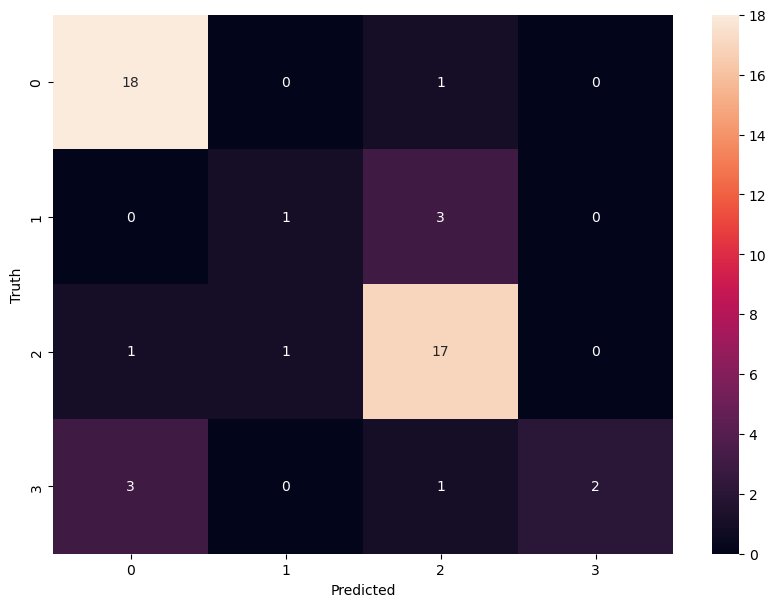

In [53]:
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [54]:
class_dict

{'kohli ': 0, 'sachin': 1, 'msd': 2, 'hitman': 3}

# Lets save the model

In [55]:
!pip install joblib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [56]:
import joblib

In [57]:
joblib.dump(best_clf, "face_detection_model.pkl")

['face_detection_model.pkl']

# Lets save the class dict

In [58]:
import json

In [59]:
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))